<a href="https://colab.research.google.com/github/mertkanalacahan/autonomous_cars_course/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/500
1000/1000 [==============================] - 0s 328us/step - loss: 1.5582 - acc: 0.5460
Epoch 2/500
1000/1000 [==============================] - 0s 61us/step - loss: 0.6644 - acc: 0.6120
Epoch 3/500
1000/1000 [==============================] - 0s 54us/step - loss: 0.4452 - acc: 0.8610
Epoch 4/500
1000/1000 [==============================] - 0s 50us/step - loss: 0.3900 - acc: 0.8930
Epoch 5/500
1000/1000 [==============================] - 0s 52us/step - loss: 0.3469 - acc: 0.9040
Epoch 6/500
1000/1000 [==============================] - 0s 64us/step - loss: 0.3139 - acc: 0.9220
Epoch 7/500
1000/1000 [==============================] - 0s 48us/step - loss: 0.2946 - acc: 0.9320
Epoch 8/500
1000/1000 [==============================] - 0s 50us/step - loss: 0.2664 - acc: 0.9380
Epoch 9/500
1000/1000 [==============================] - 0s 50us/step - loss: 0.2397 - acc: 0.9570
Epoch 10/500
1000/1000 [==============================] - 0s 51us/step - loss: 0.2237 - acc: 0.9620
Epoch 11

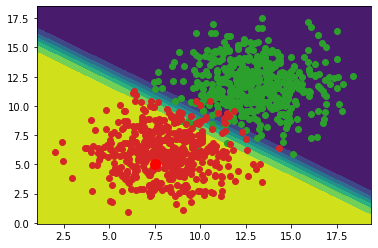

In [9]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
Y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

model = Sequential()
model.add(Dense(units = 1, input_shape=(2,), activation='sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=Y, verbose=1, batch_size = 50, epochs = 500, shuffle='true')

def plot_decision_boundary(X, Y, model):
  x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 50)
  y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1, 50)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  pred_func = model.predict(grid)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)

plot_decision_boundary(X,Y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x],[y], marker="o", markersize=10, color="red")
print("Prediction is:", prediction)